In [3]:
# Section 1 - Task 2
# Analyse by time
####################

import matplotlib.pyplot as plt
import seaborn as sns

import calendar

In [4]:
# Task 1-2-a
# Visualise the number of job posts by month

# Define Date column as datetime
df["Date"] = pd.to_datetime(df["Date"])

# Only take rows where the Date isn't empty
df_monthly_counts = df[df["Date"].isna()==False]

# Make a new column called Month, give it the month name of the value in the Date column
df_monthly_counts["Month"] = df_monthly_counts["Date"] = [x.strftime("%b") for x in df_monthly_counts["Date"]]

# Make Month a Categorical datatype for easy and sensible sorting
df_monthly_counts["Month"] = pd.Categorical(df_monthly_counts['Month'], categories=
    list(calendar.month_abbr), ordered=True)

# We only have a few months in our dataset - remove months with zero counts
df_monthly_counts["Month"].cat.remove_unused_categories(inplace=True)

# Group the data by month
df_monthly_counts = df_monthly_counts.groupby('Month').count()

# Prepare plot
df_monthly_counts['Label'] = df_monthly_counts.index
df_monthly_counts['Count'] = df_monthly_counts["Id"]

sns.set()
sns.barplot(x="Label", y="Count", data=df_monthly_counts)

# Set titles and labels
plt.title("Job postings by month", {'fontsize': '20' })
plt.xlabel('')

# Drow the graph
plt.show()

NameError: name 'pd' is not defined

In [ ]:
# Task 1-2-b
# Visualise the number of job posts by day of week

# Only take rows where the Date isn't empty
df_dow_counts = df[df["Date"].isna()==False]

# Make a new column called Month, give it the month name of the value in the Date column
df_dow_counts["DayOfWeek"] = df_dow_counts["Date"] = [x.strftime("%a") for x in df_dow_counts["Date"]]

# Make Month a Categorical datatype for easy and sensible sorting
df_dow_counts["DayOfWeek"] = pd.Categorical(df_dow_counts['DayOfWeek'], categories=
    list(calendar.day_abbr), ordered=True)

# Group the data by day of week
df_dow_counts = df_dow_counts.groupby('DayOfWeek').count()

# Prepare plot
df_dow_counts['Label'] = df_dow_counts.index
df_dow_counts['Count'] = df_dow_counts["Id"]

sns.set()
sns.barplot(x="Label", y="Count", data=df_dow_counts)

# Set titles and labels
plt.title("Job postings by day of the week", {'fontsize': '20' })
plt.xlabel('')

# Drow the graph
plt.show()

In [ ]:
# Task 1-2-c
# Visualise the number of job posts by day of the month. 

# Only take rows where the Date isn't empty
df_dom_counts = df[df["Date"].isna()==False]

# Make a new column called Month, give it the month name of the value in the Date column
df_dom_counts["DayOfMonth"] = df_dom_counts["Date"] = [int(x.strftime("%-d")) for x in df_dom_counts["Date"]]

# Make Month a Categorical datatype for easy and sensible sorting
df_dom_counts["DayOfMonth"] = pd.Categorical(df_dom_counts['DayOfMonth'], categories=
    list(range(1, 31)), ordered=True)

# Group the data by day of month
df_dom_counts = df_dom_counts.groupby('DayOfMonth').count()

# Prepare plot
df_dom_counts['Label'] = df_dom_counts.index
df_dom_counts['Count'] = df_dom_counts["Id"]

plt.figure(figsize=(12,7))

sns.set()
sns.barplot(x="Label", y="Count", data=df_dom_counts)

# Set titles and labels
plt.title("Job postings by day of the month", {'fontsize': '20' })
plt.xlabel('')

# Drow the graph
plt.show()

In [2]:
# Task 1-2-d
# Visualise trending of the job postings for the big cities.

df_largest_cities = df.groupby('Location').count()['Id']
df_largest_cities = df_largest_cities.sort_values(ascending = False)
df_largest_cities = df_largest_cities[:5].copy()

# Only take rows where the Date isn't empty
df_city_trend = df[df["Date"].isna()==False]
df_city_trend = df_city_trend.loc[df_city_trend['Location'].isin(df_largest_cities.index)]

# Group the data by city
df_city_trend = df_city_trend.groupby(['Location','Date']).count()['Id'].unstack()
df_city_trend = df_city_trend.transpose()

plt.figure(figsize=(18,7))
df_city_trend.plot(ax = plt.gca())

# Set titles and labels
plt.title("Job postings over time by city", {'fontsize': '20' })
#plt.xlabel('')

# Draw the graph
#plt.show()

# TO-DO:
# - make the ticks a bit more sensible
# - find out what the deal with the Text is
# - make some better comments

NameError: name 'df' is not defined

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dfm = pd.read_csv("data_assignment.csv")
dfm.head()


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


<AxesSubplot:title={'center':'Number of Jobs per city'}, ylabel='Location'>

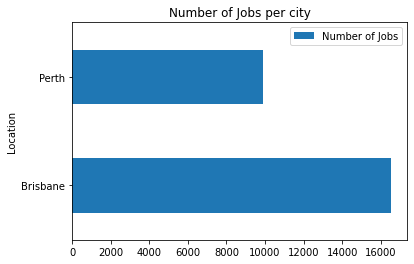

In [152]:
# I will compare Brisbane and Perth in the next section
# Counting the number of job posts per city (Brisbane and Perth)
dfm0 = dfm.drop(['Id','Date','Company','JobType','Area','SubClassification','Requirement','FullDescription','Classification','LowestSalary','HighestSalary'], axis=1)
dfm0 = dfm0[(dfm0['Location']=='Brisbane')]
dfm0.rename({'Title':'Number of Jobs'}, axis=1, inplace=True)
dfm0 = dfm0.groupby(['Location']).count().sort_values('Number of Jobs',ascending=False)

dfm1 = dfm.drop(['Id','Date','Company','JobType','Area','SubClassification','Requirement','FullDescription','Classification','LowestSalary','HighestSalary'], axis=1)
dfm1 = dfm1[(dfm1['Location']=='Perth')]
dfm1.rename({'Title':'Number of Jobs'}, axis=1, inplace=True)
dfm1 = dfm1.groupby(['Location']).count().sort_values('Number of Jobs',ascending=False)

dfm0 = pd.concat(([dfm0,dfm1]))

dfm0.plot(kind='barh', title='Number of Jobs per city')

In [144]:
# Couting the number of jobs divided by Job Type and Location
dfm2 = dfm.drop(['Id','Date','Company','Area','SubClassification','Requirement','FullDescription','Classification','LowestSalary','HighestSalary'], axis=1)
dfm2 = dfm2[(dfm2['Location']=='Brisbane')]
dfm2.rename({'Title':'Number of Jobs', 'JobType': 'Job Type'}, axis=1, inplace=True)
dfm2 = dfm2.groupby(['Location','Job Type']).count().sort_values('Number of Jobs',ascending=False)


dfm3 = dfm.drop(['Id','Date','Company','Area','SubClassification','Requirement','FullDescription','Classification','LowestSalary','HighestSalary'], axis=1)
dfm3 = dfm3[(dfm3['Location']=='Perth')]
dfm3.rename({'Title':'Number of Jobs', 'JobType': 'Job Type'}, axis=1,inplace=True)
dfm3 = dfm3.groupby(['Location','Job Type']).count().sort_values('Number of Jobs',ascending=False)

dfm2 = pd.concat(([dfm2,dfm3]))

dfm2

#ax = dfm0.unstack(level=0).plot(kind='barh', title='Number of Jobs per City and Job Type', figsize=(10,5)).legend(['Brisbane', 'Perth'])


Number of Jobs
Location Job Type                       
Brisbane Full Time                 10431
         Contract/Temp              3164
         Casual/Vacation            1543
         Part Time                   988
Perth    Full Time                  6056
         Contract/Temp              1968
         Casual/Vacation             967
         Part Time                   658

In [283]:
#Counting the number of job posts per city for the top 5 classification/sectors
dfm4 = dfm.drop(['Id','Date','Company','Area','SubClassification','Requirement','FullDescription','JobType','LowestSalary','HighestSalary'], axis=1)
dfm4 = dfm4[(dfm4['Location']=='Brisbane')]
dfm4.rename({'Title':'Number of Jobs','Classification': 'Sector'}, axis=1, inplace=True)
dfm4 = dfm4.groupby(['Location','Sector']).count().sort_values('Number of Jobs',ascending=False)
dfm4 = dfm4[:5].copy()

dfm5 = dfm.drop(['Id','Date','Company','Area','SubClassification','Requirement','FullDescription','JobType','LowestSalary','HighestSalary'], axis=1)
dfm5 = dfm5[(dfm5['Location']=='Perth')]
dfm5.rename({'Title':'Number of Jobs','Classification': 'Sector'}, axis=1, inplace=True)
dfm5 = dfm5.groupby(['Location','Sector']).count().sort_values('Number of Jobs',ascending=False)
dfm5 = dfm5[:5].copy()

pd.concat(([dfm4,dfm5]))

Number of Jobs
Location Sector                                                
Brisbane Information & Communication Technology            2041
         Trades & Services                                 1627
         Healthcare & Medical                              1341
         Manufacturing, Transport & Logistics              1338
         Hospitality & Tourism                             1032
Perth    Trades & Services                                 1146
         Mining, Resources & Energy                        1048
         Information & Communication Technology             837
         Healthcare & Medical                               792
         Manufacturing, Transport & Logistics               638

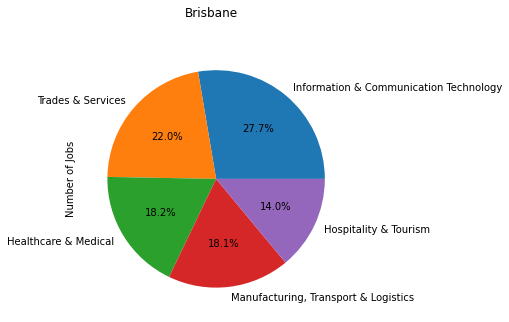

In [303]:
dfmpie = pd.concat(([dfm4,dfm5]))

#axpie = dfmpie.unstack(level=0).plot.pie(subplots=True,figsize=(15,20))

#axb = dfm4.plot.pie(subplots=True,figsize=(10,10),title='Brisbane',autopct='%1.1f%%',legend=False)

dfm41 = dfm.drop(['Id','Date','Company','Area','SubClassification','Requirement','FullDescription','JobType','LowestSalary','HighestSalary'], axis=1)
dfm41 = dfm41[(dfm41['Location']=='Brisbane')]
dfm41.rename({'Title':'Number of Jobs','Classification': 'Sector'}, axis=1, inplace=True)
dfm41 = dfm41.drop(['Location'],axis=1)
dfm41 = dfm41.groupby(['Sector']).count().sort_values('Number of Jobs',ascending=False)
dfm41 = dfm41[:5].copy()

axb = dfm41.plot.pie(subplots=True,figsize=(5,5),title='Brisbane',autopct='%1.1f%%',legend=False)

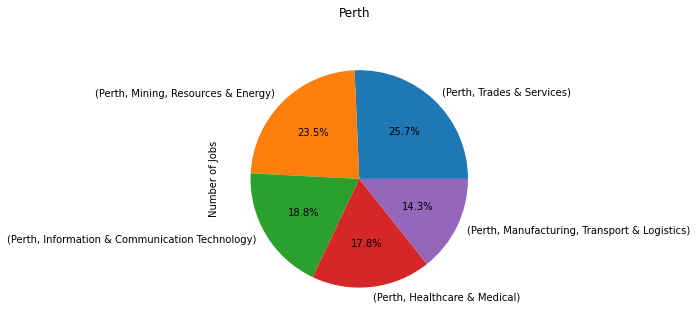

In [314]:
axp = dfm5.plot.pie(subplots=True,figsize=(5,5),title='Perth',autopct='%1.1f%%',legend=False)

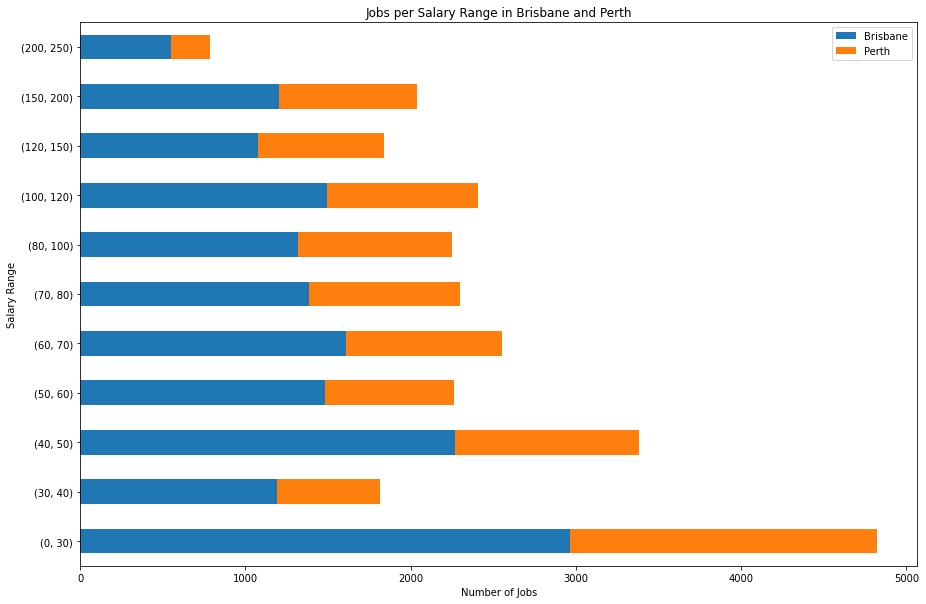

In [212]:
#Counting the number of jobs in Brisbane and Perth by salary range
dfm6 = dfm.drop(['Id','Date','Company','Area','SubClassification','Requirement','FullDescription','JobType','Classification'], axis=1)
dfm6 = dfm6[(dfm6['Location']=='Brisbane')]
dfm6 = dfm6.groupby(['Location','LowestSalary','HighestSalary']).count().sort_values('Title',ascending=False)

dfm7 = dfm.drop(['Id','Date','Company','Area','SubClassification','Requirement','FullDescription','JobType','Classification'], axis=1)
dfm7 = dfm7[(dfm7['Location']=='Perth')]
dfm7 = dfm7.groupby(['Location','LowestSalary','HighestSalary']).count().sort_values('Title',ascending=False)

dfm6 = pd.concat(([dfm6,dfm7]))

ax6 = dfm6.unstack(level=0).plot(kind='barh', title='Jobs per Salary Range in Brisbane and Perth', figsize=(15,10), stacked=True)
ax6.set_ylabel('Salary Range')
ax6.set_xlabel('Number of Jobs')
ax6.legend(['Brisbane','Perth'])

In [225]:
#Counting the number of jobs per company and showing their sector
dfm81 = dfm.drop(['Id','Date','Area','SubClassification','Requirement','FullDescription','JobType','LowestSalary','HighestSalary'], axis=1)
dfm81 = dfm81[(dfm81['Location']=='Brisbane')]
dfm81.rename({'Title':'Number of Jobs', 'Classification': 'Sector'}, axis=1, inplace=True)
dfm81 = dfm81.groupby(['Location','Company','Sector']).count().sort_values('Number of Jobs',ascending=False)
dfm81 = dfm81[:5].copy()

dfm82 = dfm.drop(['Id','Date','Area','SubClassification','Requirement','FullDescription','JobType','LowestSalary','HighestSalary'], axis=1)
dfm82 = dfm82[(dfm82['Location']=='Perth')]
dfm82.rename({'Title':'Number of Jobs', 'Classification': 'Sector'}, axis=1, inplace=True)
dfm82 = dfm82.groupby(['Location','Company','Sector']).count().sort_values('Number of Jobs',ascending=False)
dfm82 = dfm82[:5].copy()

dfm81 = pd.concat(([dfm81,dfm82]))
dfm81

Number of Jobs
Location Company                                            Sector                                                
Brisbane Jora Local                                         Hospitality & Tourism                              235
         The University of Queensland                       Education & Training                               121
         Paxus                                              Information & Communication Technology             121
         Hudson                                             Information & Communication Technology             116
         MW Recruitment                                     Accounting                                          92
Perth    Jora Local                                         Hospitality & Tourism                              163
         Talent – Winner ‘Seek Large Recruitment Agency ... Information & Communication Technology              78
         KBE Legal Hub                                      Legal                                               72
         Hays Resources & Mining                            Mining, Resources & Energy                          52
         Bankwest Group Services                            Information & Communication Technology              49

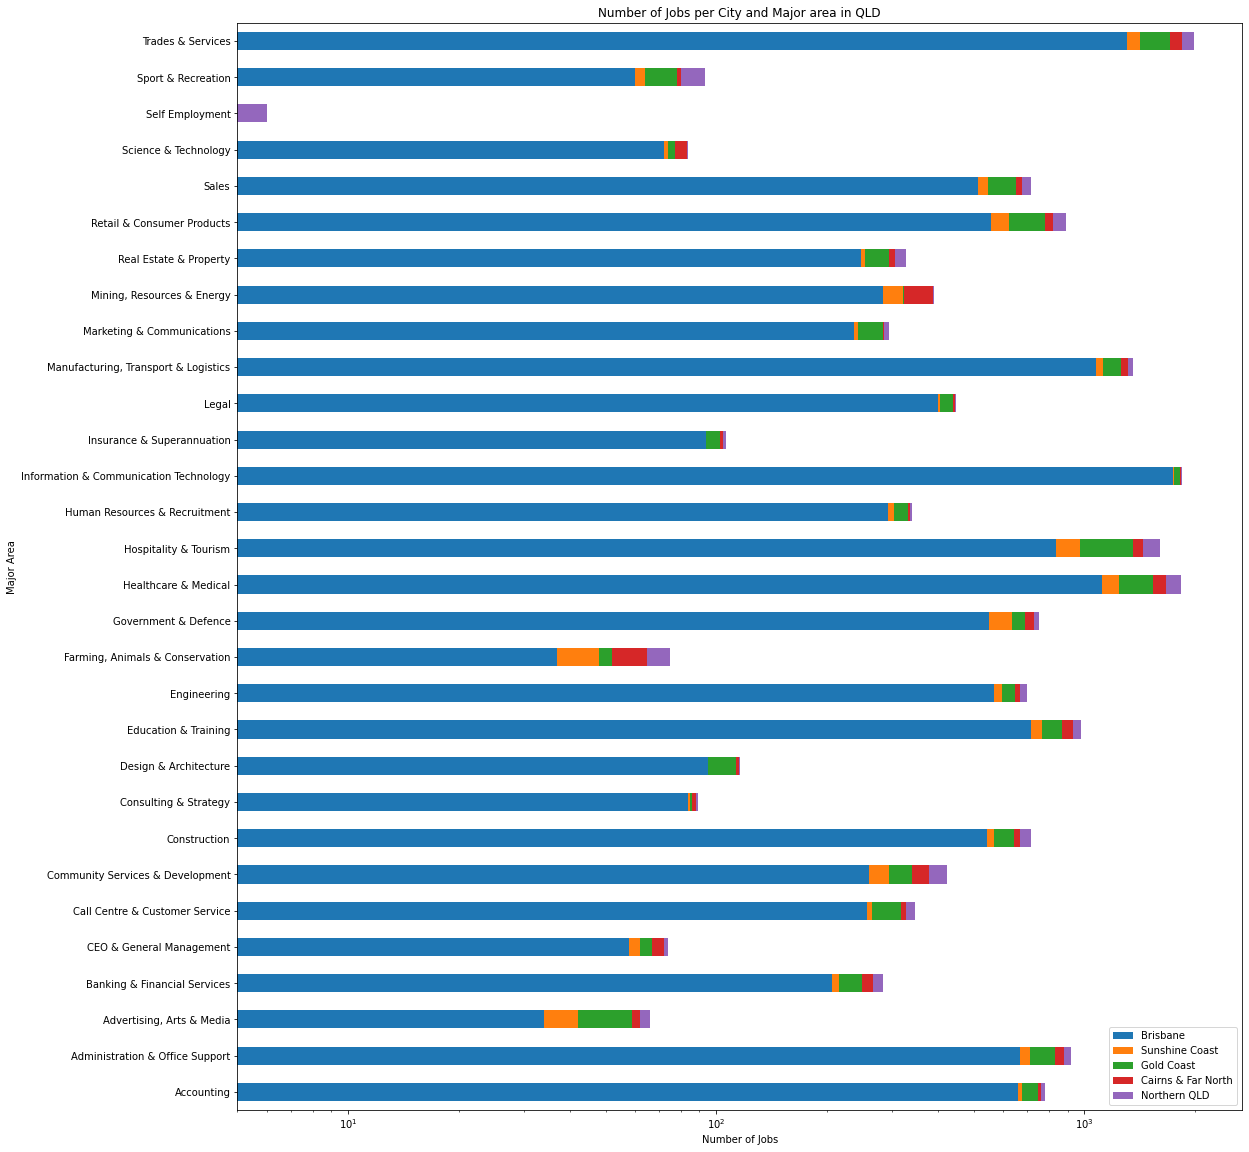

In [214]:
#Generating a dataset for each city in QLD with the total jobs per Classification (Major Area)
#Concatenating the dataset of each city and plotting on a stacked bar graph

dfm8 = dfm[(dfm['Location']=='Brisbane') & (dfm['HighestSalary']>39)]
dfm8 = dfm8.drop(['Id','Date','Company','Area', 'JobType','SubClassification','Requirement','FullDescription','LowestSalary','HighestSalary'], axis=1)
dfm8.rename({'Title':'Number of Jobs', 'Classification': 'Major Area'}, axis=1, inplace=True)
dfm8 = dfm8.groupby(['Location','Major Area']).count().sort_values('Number of Jobs',ascending=False)

dfm9 = dfm[(dfm['Location']=='Sunshine Coast') & (dfm['HighestSalary']>39)]
dfm9 = dfm9.drop(['Id','Date','Company','Area', 'JobType','SubClassification','Requirement','FullDescription','LowestSalary','HighestSalary'], axis=1)
dfm9.rename({'Title':'Number of Jobs','Classification': 'Major Area'}, axis=1,inplace=True)
dfm9 = dfm9.groupby(['Location','Major Area']).count().sort_values('Number of Jobs',ascending=False)

dfm10 = dfm[(dfm['Location']=='Gold Coast') & (dfm['HighestSalary']>39)]
dfm10 = dfm10.drop(['Id','Date','Company','Area', 'JobType','SubClassification','Requirement','FullDescription','LowestSalary','HighestSalary'], axis=1)
dfm10.rename({'Title':'Number of Jobs','Classification': 'Major Area'}, axis=1,inplace=True)
dfm10 = dfm10.groupby(['Location','Major Area']).count().sort_values('Number of Jobs',ascending=False)

dfm11 = dfm[(dfm['Location']=='Cairns & Far North') & (dfm['HighestSalary']>39)]
dfm11 = dfm11.drop(['Id','Date','Company','Area', 'JobType','SubClassification','Requirement','FullDescription','LowestSalary','HighestSalary'], axis=1)
dfm11.rename({'Title':'Number of Jobs','Classification': 'Major Area'}, axis=1,inplace=True)
dfm11 = dfm11.groupby(['Location','Major Area']).count().sort_values('Number of Jobs',ascending=False)

dfm12 = dfm[(dfm['Location']=='Northern QLD') & (dfm['HighestSalary']>39)]
dfm12 = dfm12.drop(['Id','Date','Company','Area', 'JobType','SubClassification','Requirement','FullDescription','LowestSalary','HighestSalary'], axis=1)
dfm12.rename({'Title':'Number of Jobs','Classification': 'Major Area'}, axis=1,inplace=True)
dfm12 = dfm12.groupby(['Location','Major Area']).count().sort_values('Number of Jobs',ascending=False)

dfm9 = pd.concat(([dfm8,dfm9,dfm10,dfm11,dfm12]))

ax9 = dfm9.unstack(level=0).plot(kind='barh', title='Number of Jobs per City and Major area in QLD', figsize=(18,20),log=True, stacked=True)
ax9.set_xlabel('Number of Jobs')
ax9.legend(['Brisbane','Sunshine Coast','Gold Coast','Cairns & Far North','Northern QLD'])

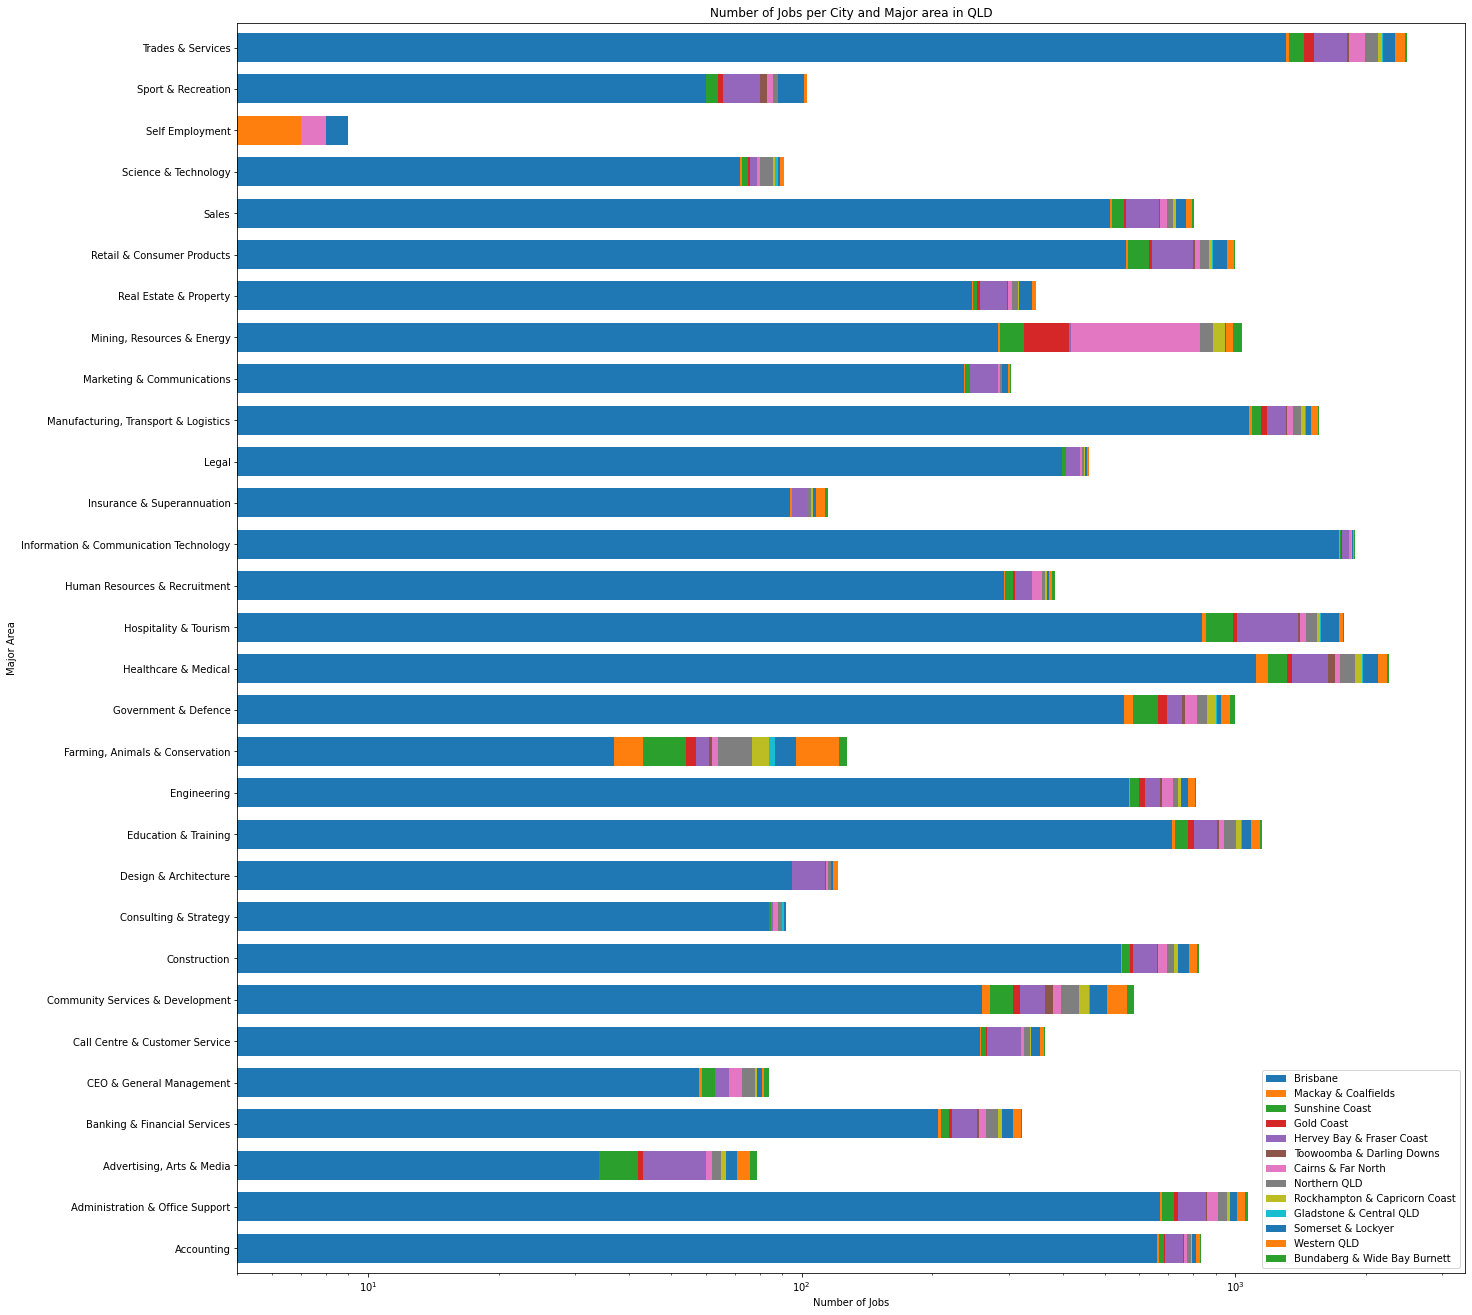

In [215]:
dfmt = dfm.drop(['Id','Date','Company','Area', 'JobType','SubClassification','Requirement','FullDescription','LowestSalary'], axis=1)
dfmt = dfmt[(dfmt['HighestSalary']>39)]
dfmt = dfmt.drop(['HighestSalary'],axis=1)
dfmt.rename({'Classification': 'Major Area'}, axis=1,inplace=True)
dfmt.set_index('Location',inplace=True)
dfmt = dfmt.loc[[ 'Brisbane', 'Mackay & Coalfields', 'Sunshine Coast',
                  'Gold Coast', 'Hervey Bay & Fraser Coast',
                  'Toowoomba & Darling Downs','Cairns & Far North',
                  'Northern QLD', 'Rockhampton & Capricorn Coast',
                  'Gladstone & Central QLD', 'Somerset & Lockyer',
                  'Western QLD', 'Bundaberg & Wide Bay Burnett']]
dfmt = dfmt.groupby(["Location",'Major Area']).count().sort_values('Title',ascending=False)
axt = dfmt.unstack(level=0).plot(kind='barh', title='Number of Jobs per City and Major Area in QLD', figsize=(22,23),width=0.7,log=True, stacked=True)
axt.set_xlabel('Number of Jobs')
axt.legend(['Brisbane', 'Mackay & Coalfields', 'Sunshine Coast',
                  'Gold Coast', 'Hervey Bay & Fraser Coast',
                  'Toowoomba & Darling Downs','Cairns & Far North',
                  'Northern QLD', 'Rockhampton & Capricorn Coast',
                  'Gladstone & Central QLD', 'Somerset & Lockyer',
                  'Western QLD', 'Bundaberg & Wide Bay Burnett'])
